In [25]:
import numpy as np
import pandas as pd
import os

In [26]:
df = pd.read_csv('/content/Electric_Vehicle_Population_Data.csv')
df.head()

,VIN (1-10),Country,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10


In [27]:
df.shape

(177866, 17)

In [28]:
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,177861.000000,177866.000000,177866.000000,177866.000000,177477.000000,1.778660e+05,1.778610e+05
mean,98172.453506,2020.515512,58.842162,1073.109363,29.127481,2.202313e+08,5.297672e+10
std,2442.450668,2.989384,91.981298,8358.624956,14.892169,7.584987e+07,1.578047e+09
min,1545.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2019.000000,0.000000,0.000000,18.000000,1.814743e+08,5.303301e+10
50%,98122.000000,2022.000000,0.000000,0.000000,33.000000,2.282522e+08,5.303303e+10
75%,98370.000000,2023.000000,75.000000,0.000000,42.000000,2.548445e+08,5.305307e+10
max,99577.000000,2024.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   Country                                            177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [30]:
df.dtypes

VIN (1-10)                                            object
Country                                               object
City                                                  object
State                                                 object
Postal Code                                          float64
Model Year                                             int64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                         int64
Base MSRP                                              int64
Legislative District                                 float64
DOL Vehicle ID                                         int64
Vehicle Location                                      object
Electric Utility                                      object
2020 Census Tract       

In [31]:
df['Country'].value_counts()

Country
King         92740
Snohomish    21001
Pierce       13782
Clark        10416
Thurston      6428
             ...  
Sarpy            1
Suffolk          1
Beaufort         1
Meade            1
Hardin           1
Name: count, Length: 196, dtype: int64

In [32]:
df['City'].value_counts()

City
Seattle          29447
Bellevue          8931
Redmond           6478
Vancouver         6193
Bothell           5863
                 ...  
Plymouth             1
Tempe                1
Chapel Hill          1
Vista                1
Elizabethtown        1
Name: count, Length: 723, dtype: int64

In [33]:
df['State'].value_counts()

State
WA    177477
CA       101
VA        46
MD        31
TX        23
NC        16
IL        15
CO        12
FL        10
AZ        10
HI         9
NV         8
NJ         8
NY         7
SC         7
CT         6
AL         6
GA         6
MA         5
OR         5
MO         5
PA         4
LA         4
OH         4
BC         3
ID         3
KY         3
DC         3
IN         3
UT         3
MI         2
RI         2
AR         2
WY         2
KS         2
MN         2
NE         2
DE         1
OK         1
AK         1
AE         1
IA         1
NH         1
TN         1
NM         1
AP         1
Name: count, dtype: int64

In [34]:
df['Make'].value_counts()

Make
TESLA                   79659
NISSAN                  13998
CHEVROLET               13678
FORD                     9199
BMW                      7570
KIA                      7432
TOYOTA                   6288
VOLKSWAGEN               5004
JEEP                     4480
HYUNDAI                  4406
RIVIAN                   4312
VOLVO                    4133
AUDI                     3646
CHRYSLER                 2993
MERCEDES-BENZ            1589
PORSCHE                  1139
MITSUBISHI                958
MINI                      898
POLESTAR                  882
HONDA                     833
SUBARU                    831
FIAT                      784
DODGE                     568
MAZDA                     476
CADILLAC                  382
LEXUS                     370
SMART                     270
LINCOLN                   267
LUCID                     240
JAGUAR                    232
GENESIS                   182
LAND ROVER                 56
FISKER                     49
ALFA 

In [35]:
df['Model'].value_counts()

Model
MODEL Y        35989
MODEL 3        30092
LEAF           13366
MODEL S         7735
BOLT EV         6821
               ...  
745LE              2
918                1
S-10 PICKUP        1
SPECTRE            1
BENTAYGA           1
Name: count, Length: 139, dtype: int64

In [36]:
df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()

Clean Alternative Fuel Vehicle (CAFV) Eligibility
Eligibility unknown as battery range has not been researched    91950
Clean Alternative Fuel Vehicle Eligible                         66331
Not eligible due to low battery range                           19585
Name: count, dtype: int64

In [37]:
df['Electric Vehicle Type'].value_counts()

Electric Vehicle Type
Battery Electric Vehicle (BEV)            139210
Plug-in Hybrid Electric Vehicle (PHEV)     38656
Name: count, dtype: int64

In [38]:
df['Electric Range'].value_counts()

Electric Range
0      91950
215     6376
220     4115
25      4107
32      3911
       ...  
36         4
95         3
11         3
51         3
57         2
Name: count, Length: 102, dtype: int64

In [39]:
top_types = df['Country'].value_counts().nlargest(29).index
df['Country_modified'] = df['Country'].where(df['Country'].isin(top_types), 'Other')
counts = df['Country_modified'].value_counts()

In [40]:
counts

Country_modified
King            92740
Snohomish       21001
Pierce          13782
Clark           10416
Thurston         6428
Kitsap           5840
Spokane          4586
Whatcom          4253
Benton           2147
Skagit           1910
Island           1882
Other            1106
Clallam          1058
Chelan           1047
Yakima            995
Jefferson         977
San Juan          942
Cowlitz           897
Mason             823
Lewis             739
Grays Harbor      625
Kittitas          623
Franklin          585
Grant             561
Walla Walla       437
Douglas           366
Whitman           334
Klickitat         284
Okanogan          263
Stevens           219
Name: count, dtype: int64

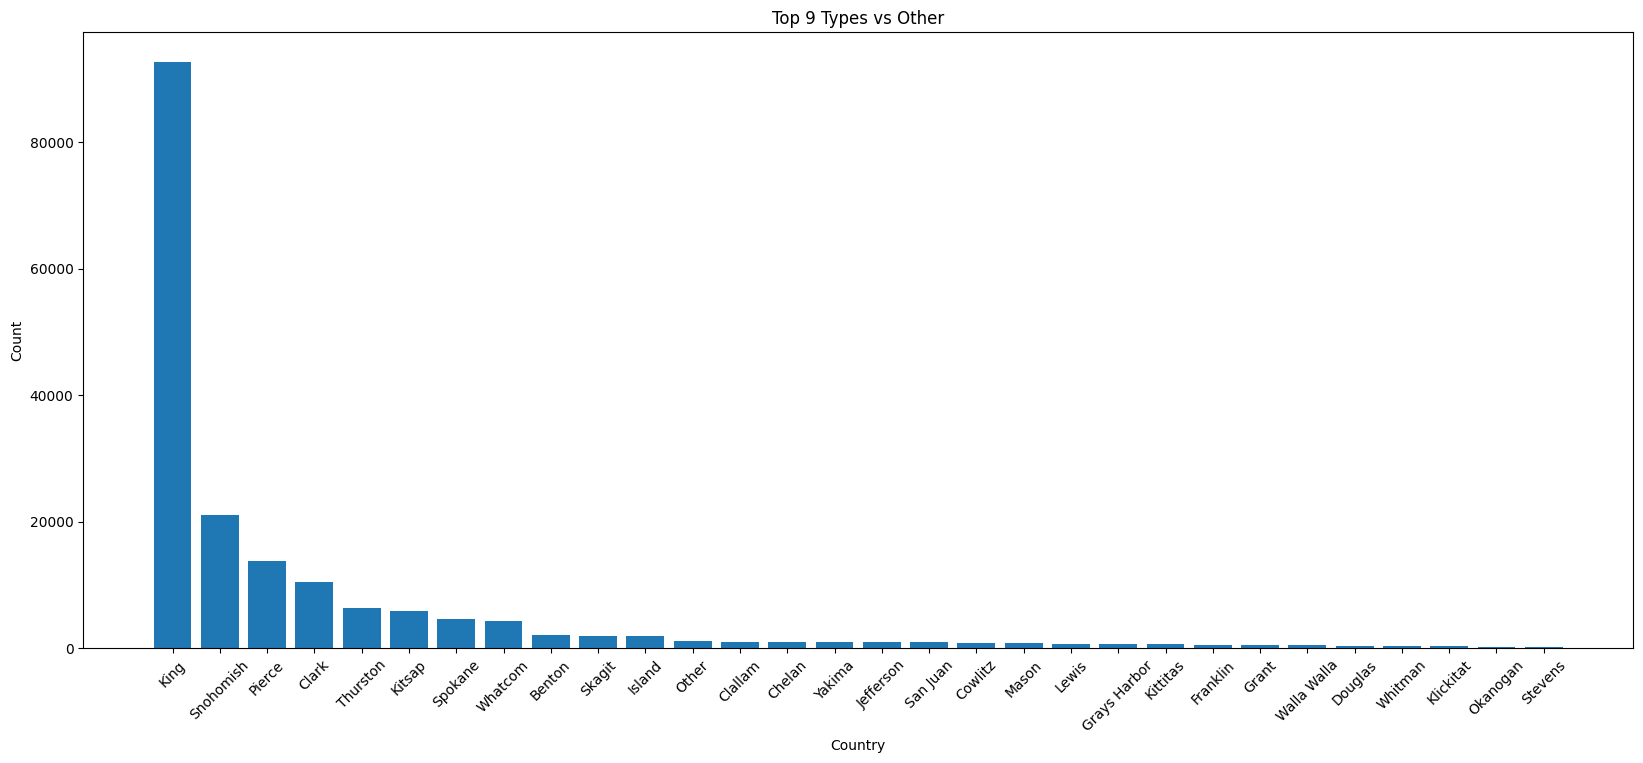

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
plt.bar(counts.index, counts.values)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Top 9 Types vs Other')
plt.xticks(rotation=45)
plt.show()

<Axes: ylabel='count'>

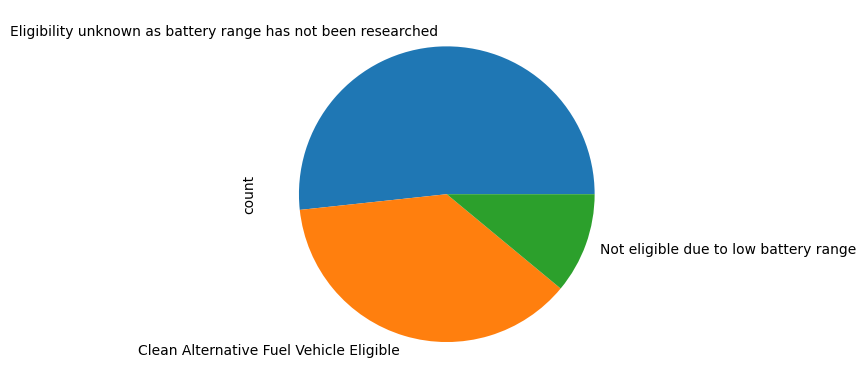

In [42]:
df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts().plot.pie()

In [43]:
df.head()

,VIN (1-10),Country,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,Country_modified
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10,King
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10,Snohomish
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10,King
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10,King
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10,Kitsap


In [44]:
top_types = df['Model'].value_counts().nlargest(29).index
df['Model_Modified'] = df['Model'].where(df['Model'].isin(top_types), 'Other')
counts = df['Model_Modified'].value_counts()

In [45]:
df.head()

,VIN (1-10),Country,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,Country_modified,Model_Modified
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10,King,MODEL Y
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10,Snohomish,MODEL Y
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10,King,MODEL S
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10,King,MODEL S
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10,Kitsap,MODEL Y


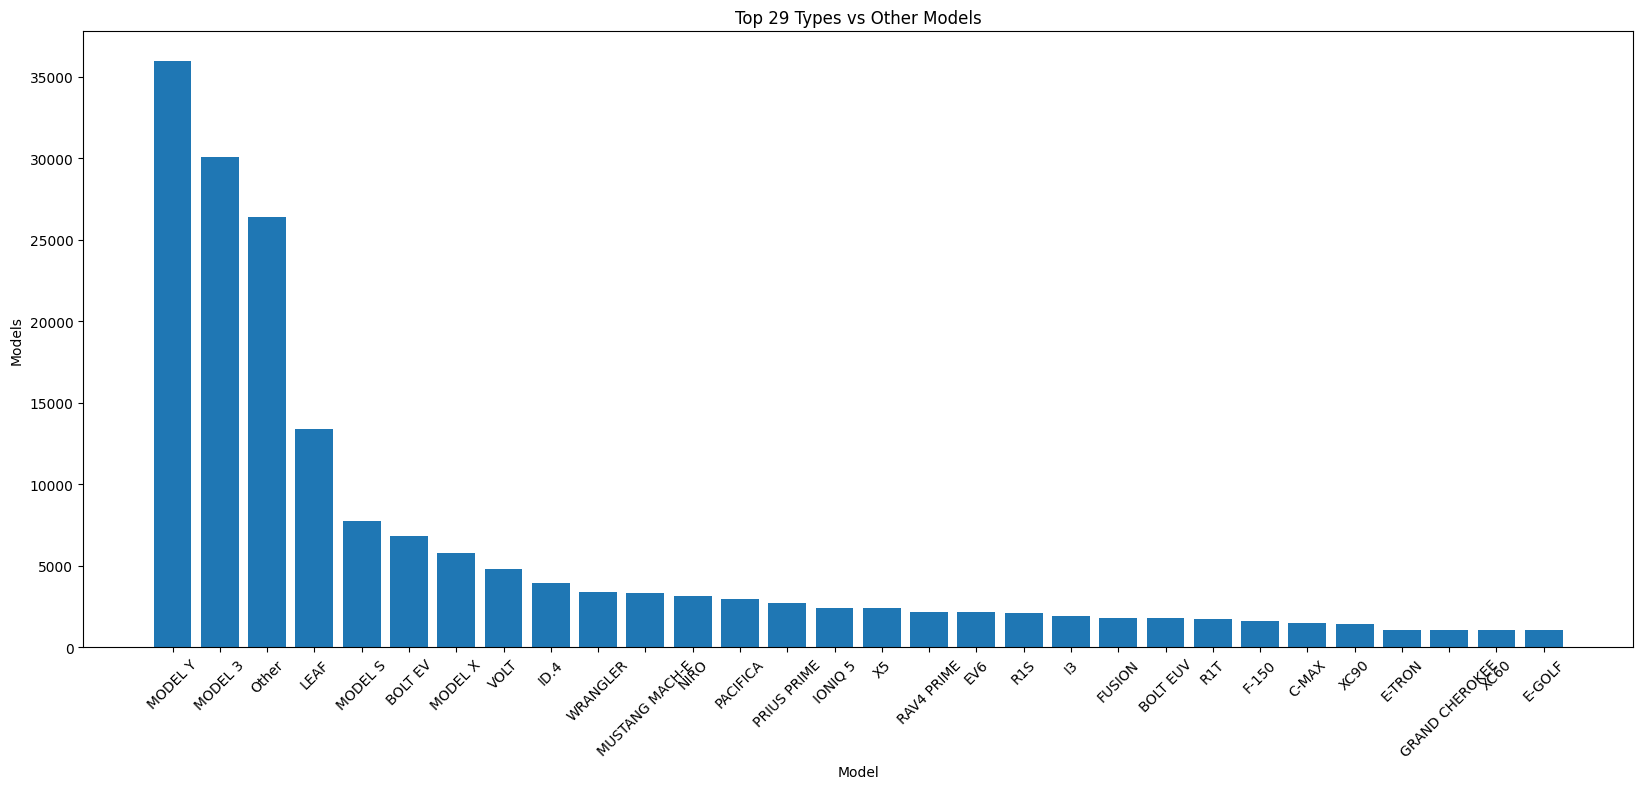

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
plt.bar(counts.index, counts.values)
plt.xlabel('Model')
plt.ylabel('Models')
plt.title('Top 29 Types vs Other Models')
plt.xticks(rotation=45)
plt.show()

In [47]:
top_types = df['City'].value_counts().nlargest(29).index
df['City_Modified'] = df['City'].where(df['City'].isin(top_types), 'Other')
counts = df['City_Modified'].value_counts()

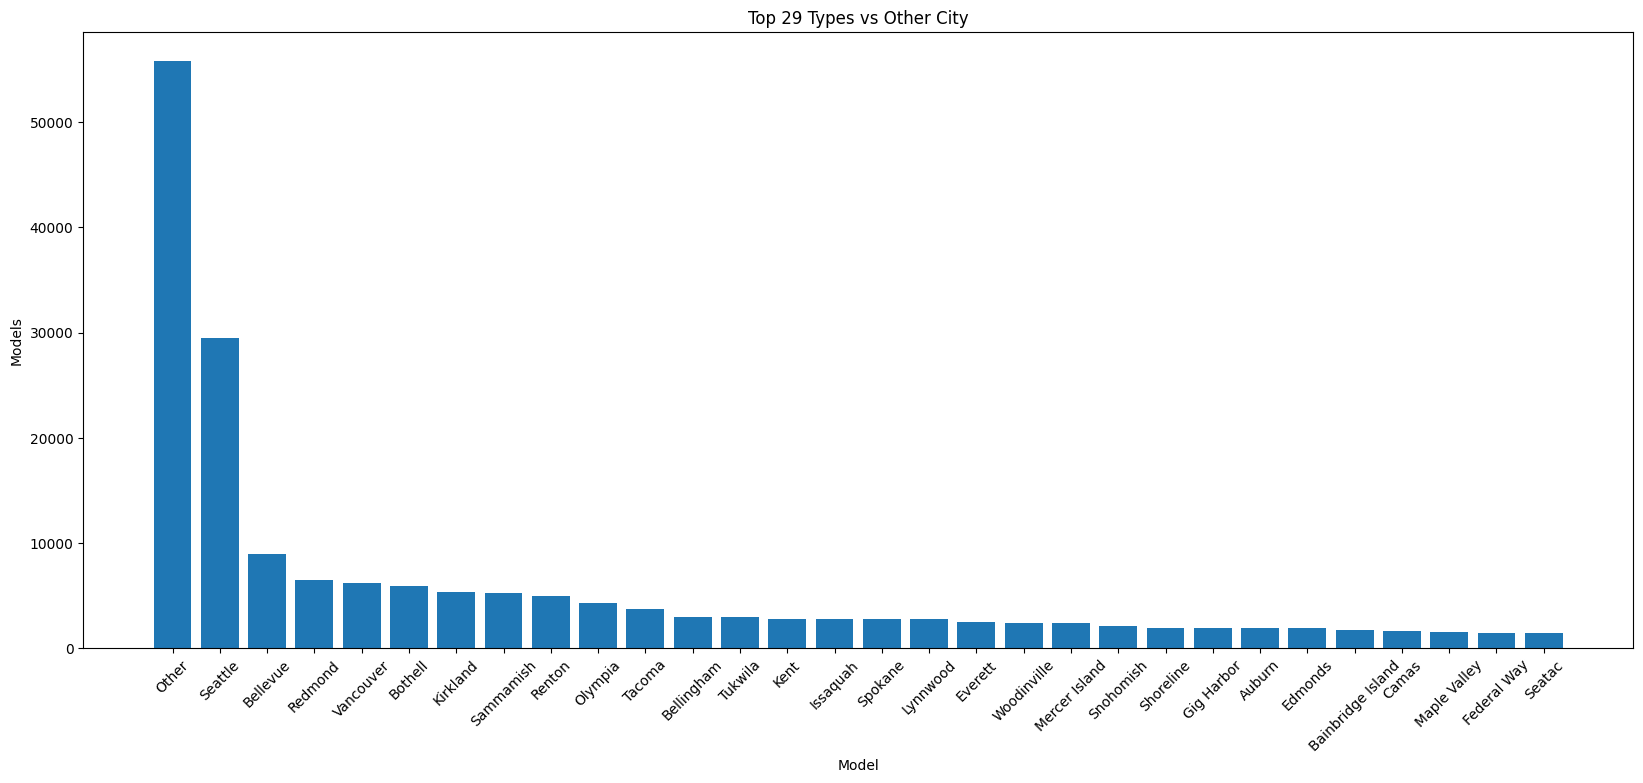

In [48]:
plt.figure(figsize=(20,8))
plt.bar(counts.index, counts.values)
plt.xlabel('Model')
plt.ylabel('Models')
plt.title('Top 29 Types vs Other City')
plt.xticks(rotation=45)
plt.show()

In [49]:
top_types = df['State'].value_counts().nlargest(9).index
df['State_Modified'] = df['State'].where(df['State'].isin(top_types), 'Other')
counts = df['State_Modified'].value_counts()

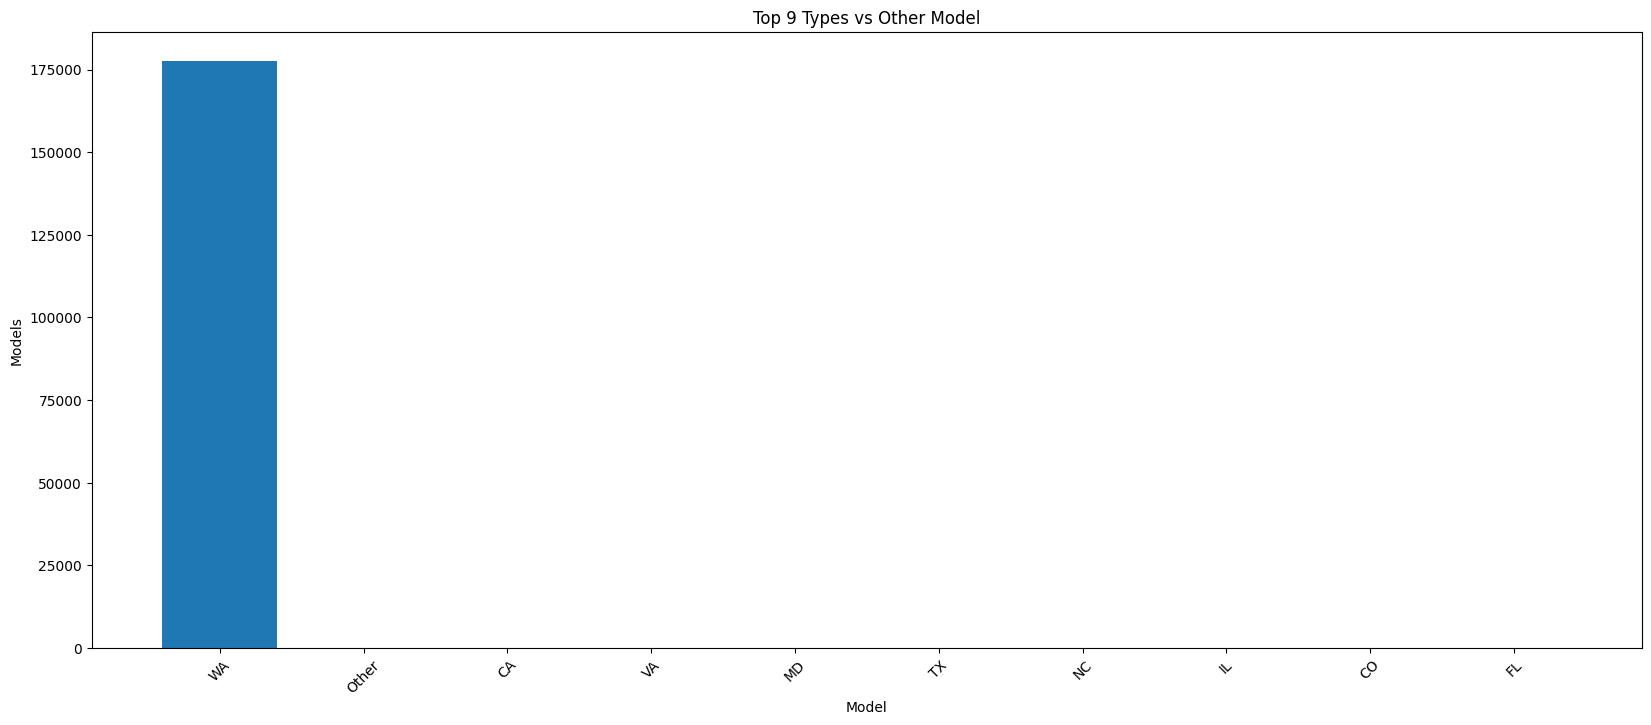

In [50]:
plt.figure(figsize=(20,8))
plt.bar(counts.index, counts.values)
plt.xlabel('Model')
plt.ylabel('Models')
plt.title('Top 9 Types vs Other Model')
plt.xticks(rotation=45)
plt.show()

In [51]:
top_types = df['Make'].value_counts().nlargest(29).index
df['Make_Modified'] = df['Make'].where(df['Make'].isin(top_types), 'Other')
counts = df['Make_Modified'].value_counts()

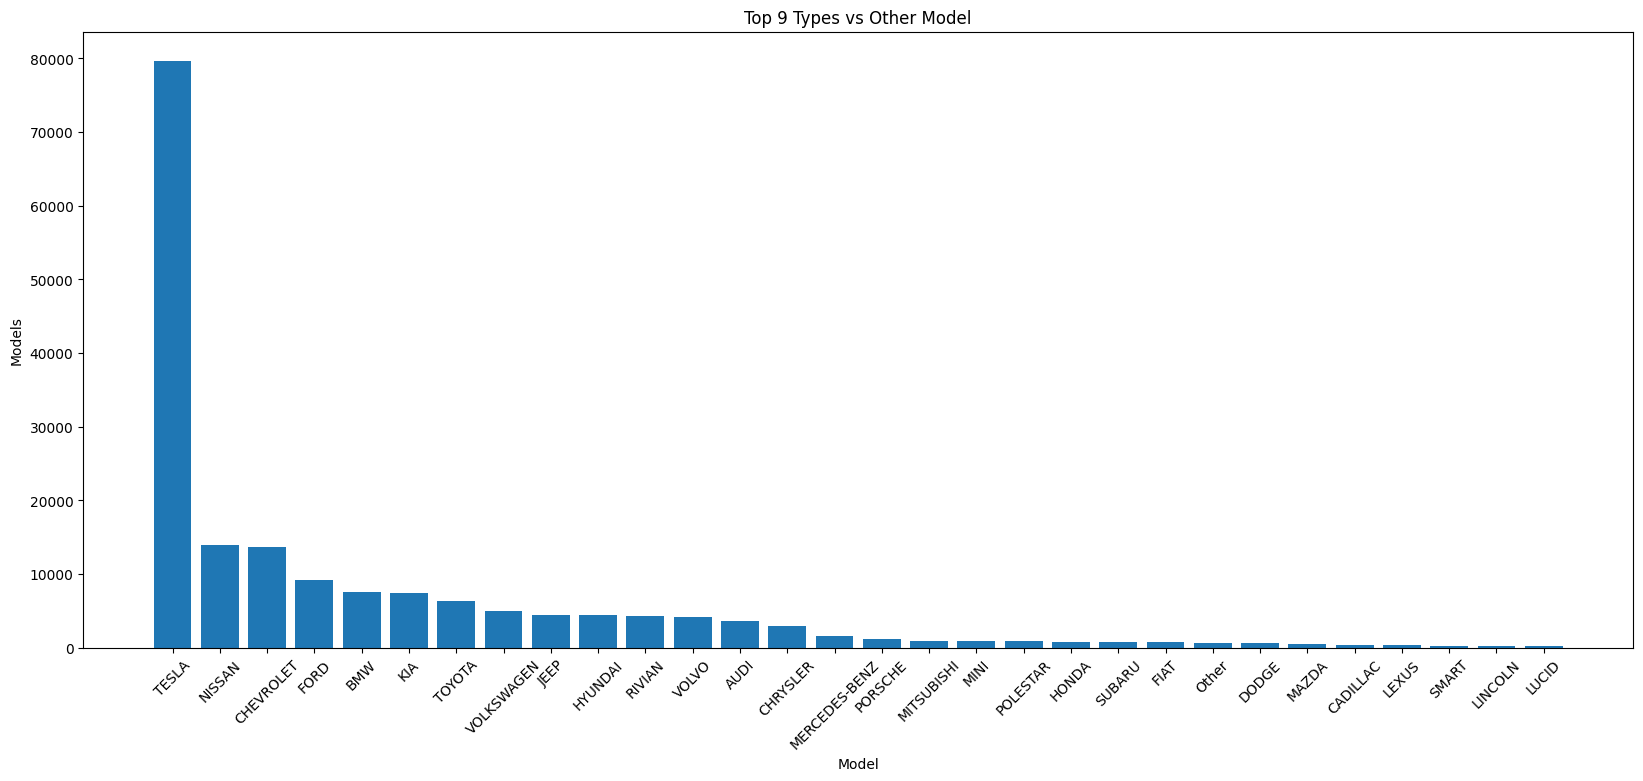

In [52]:
plt.figure(figsize=(20,8))
plt.bar(counts.index, counts.values)
plt.xlabel('Model')
plt.ylabel('Models')
plt.title('Top 9 Types vs Other Model')
plt.xticks(rotation=45)
plt.show()

In [55]:
top_types = df['Electric Range'].value_counts().nlargest(9).index
df['ElectricRange_Modified'] = df['Electric Range'].where(df['Electric Range'].isin(top_types), 'Other')
counts = df['ElectricRange_Modified'].value_counts()

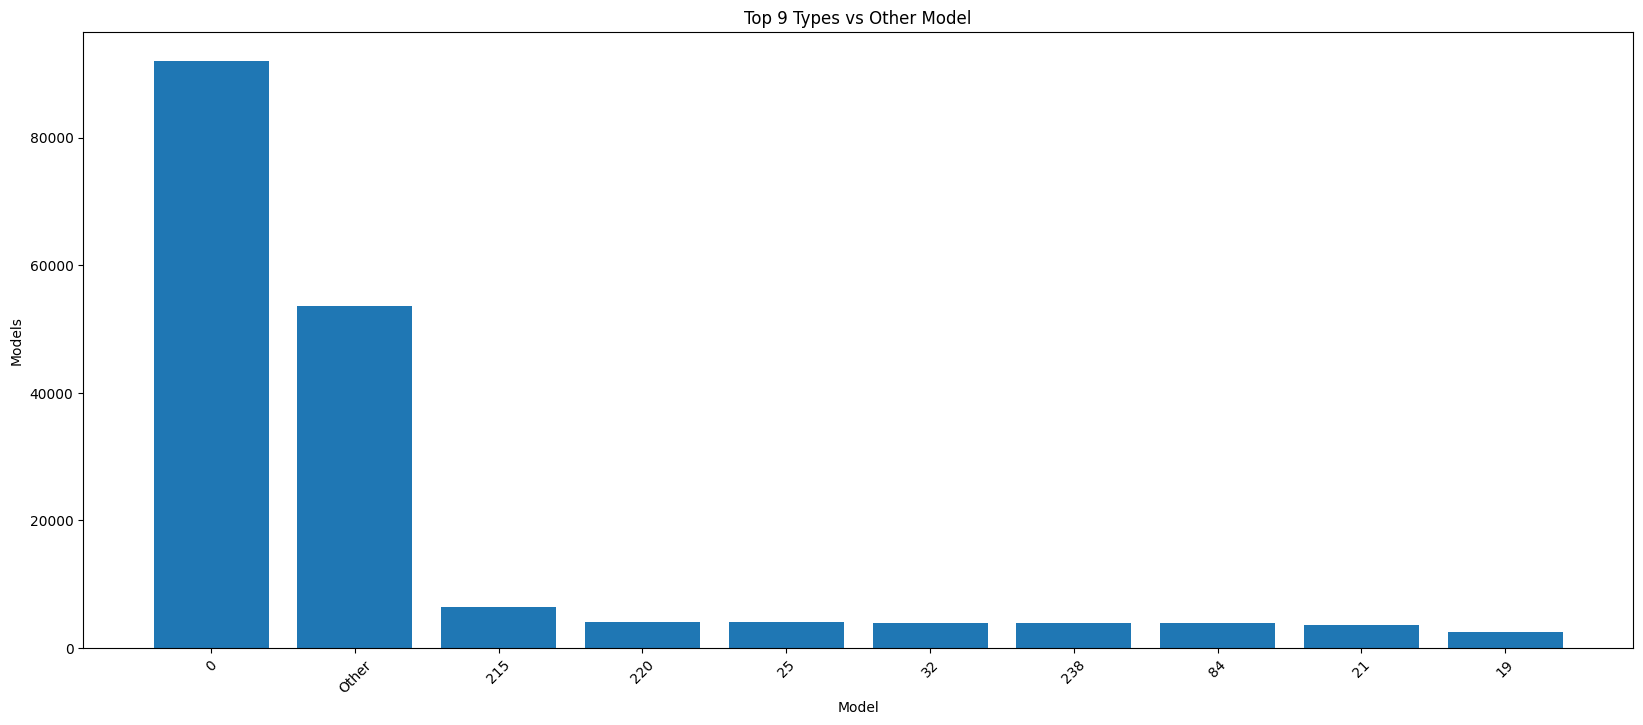

In [59]:
import matplotlib.pyplot as plt
# Convert the index to a numerical range
x_pos = range(len(counts.index))

plt.figure(figsize=(20,8))
plt.bar(x_pos, counts.values) # Plot using numerical positions
plt.xlabel('Model')
plt.ylabel('Models')
plt.title('Top 9 Types vs Other Model')

# Set the x-axis labels to the original categories
plt.xticks(x_pos, counts.index, rotation=45)

plt.show()